In [27]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


In [28]:
# Load the Diabetes dataset
columns = "age sex bmi map tc ldl hdl tch ltg glu".split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [29]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(353, 10) (353,)
(89, 10) (89,)


In [30]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

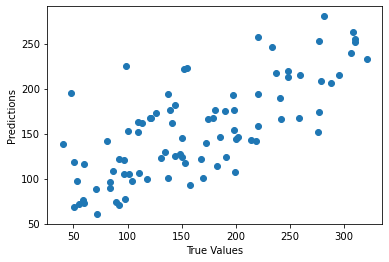

In [31]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

!("img/1.png")

In [9]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "img/1.png")
#Visual Representation of Train/Test Split and Cross Validation. H/t to my DSI instructor, Joseph Nelson!


In [10]:
Image(url= "img/2.png")
#Visual representation of K-Folds. Again, H/t to Joseph Nelson!

In [12]:
import numpy as np
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [14]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]


# Leave One Out Cross Validation (LOOCV)


In [15]:
from sklearn.model_selection import LeaveOneOut 
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)


for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [22]:
# Necessary imports: 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
df

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [24]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.4554861  0.46138572 0.40094084 0.55220736 0.43942775 0.56923406]


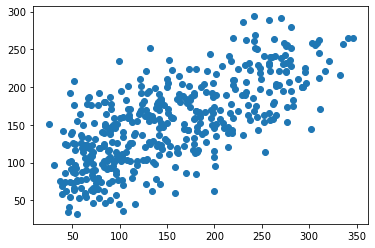

In [25]:
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=6)
plt.scatter(y, predictions)

In [26]:
accuracy = metrics.r2_score(y, predictions)
print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.4908065838640774
